In [1]:
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.monitor import Monitor


from trading_envs import PriceDiffTradingEnv, PriceDiffTradingEnvUpdated
from logger import TrainingLoggerCallback
from data_and_plots import (
    generate_sine_wave,
    training_plot,
    results_plot_continuous,
    plot_shares_changes_fixed_size,
    plot,
)
from helper import predict_data_env
import torch
import random

In [2]:
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

# ziarno dla NumPy
np.random.seed(42)

# ziarno dla standardowego generatora liczb losowych Pythona
random.seed(42)

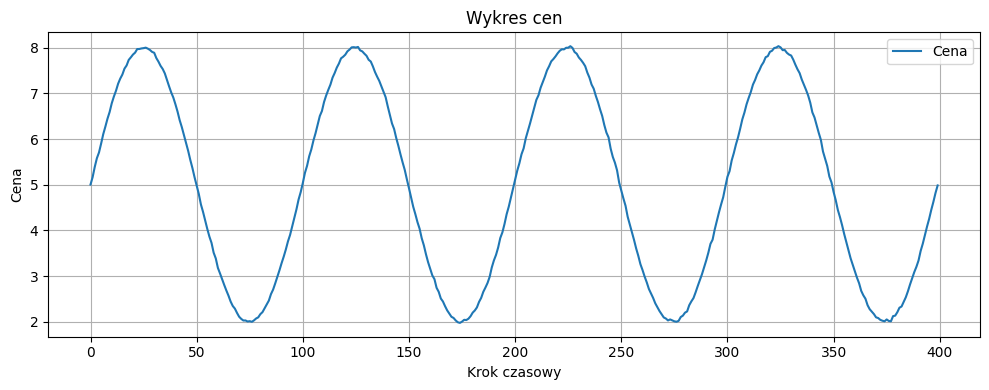

In [3]:
prices = generate_sine_wave(seed=42)
plot(prices)

Using cuda device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 400      |
|    ep_rew_mean     | 102      |
| time/              |          |
|    fps             | 807      |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 400      |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 107          |
| time/                   |              |
|    fps                  | 670          |
|    iterations           | 2            |
|    time_elapsed         | 1            |
|    total_timesteps      | 800          |
| train/                  |              |
|    approx_kl            | 0.0032111208 |
|    clip_fraction        | 0.0162       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.42        |
|    

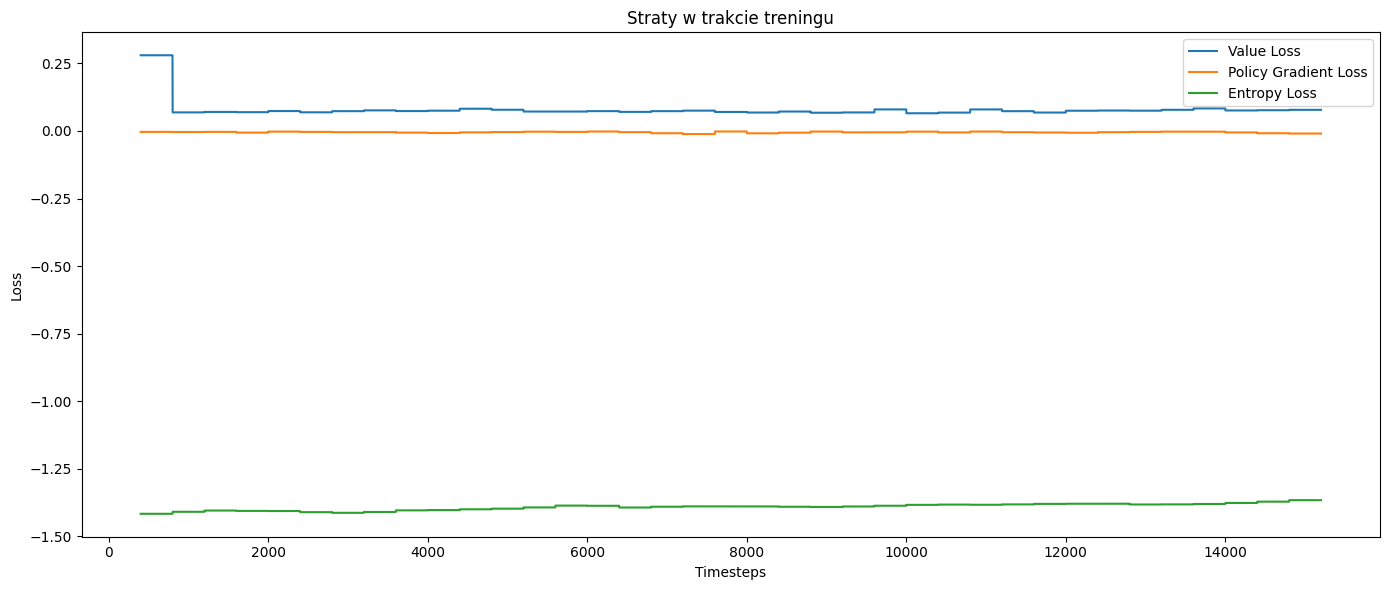

In [12]:
# Tworzenie instacji środowiska
env_agent = PriceDiffTradingEnv(prices)
env_agent = Monitor(env_agent)

# Sprawdzenie zgodności środowiska z stable_baselines3
check_env(env_agent)

logger_callback = TrainingLoggerCallback()
# Tworzenie modelu PPO
model_agent = PPO(
    "MlpPolicy",
    env_agent,
    # policy_kwargs=dict(
    #     net_arch=[
    #         128,
    #         128,
    #     ]
    # ),
    #   learning_rate=0.00005,        # domyślnie 3e-4
    n_steps=400,  # liczba kroków zanim agent zrobi aktualizację
    batch_size=100,  # batch size do uczenia
    # n_epochs=10,                 # ile razy przebiega po danych przy każdej aktualizacji
    gamma=0.3,  # współczynnik dyskontujący nagrody
    # gae_lambda=0.95,             # współczynnik GAE
    # clip_range=0.2,              # zakres klipu PPO (stabilizacja treningu)
    # ent_coef=0.9,                # zachęta do eksploracji
    verbose=1,
)

# Trening modelu
model_agent.learn(total_timesteps=15000, callback=logger_callback)


training_plot(logger_callback=logger_callback)

In [5]:
env_predict, lista = predict_data_env(
    env=PriceDiffTradingEnv, data=prices, agent=model_agent
)

Krok: 1|Cena: 5.17|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|Nagroda: 0.00|
Krok: 2|Cena: 5.39|Gotówka: 100.00|Akcje: 0|Wartość portfela: 100.00|Nagroda: 0.00|
Krok: 3|Cena: 5.58|Gotówka: 94.61|Akcje: 1|Wartość portfela: 100.19|Nagroda: 0.50|
Krok: 4|Cena: 5.71|Gotówka: 83.44|Akcje: 3|Wartość portfela: 100.57|Nagroda: 0.50|
Krok: 5|Cena: 5.90|Gotówka: 60.61|Akcje: 7|Wartość portfela: 101.93|Nagroda: 0.50|
Krok: 6|Cena: 6.11|Gotówka: 31.09|Akcje: 12|Wartość portfela: 104.41|Nagroda: 0.50|
Krok: 7|Cena: 6.27|Gotówka: 18.87|Akcje: 14|Wartość portfela: 106.71|Nagroda: 0.50|
Krok: 8|Cena: 6.45|Gotówka: 12.60|Akcje: 15|Wartość portfela: 109.32|Nagroda: 0.50|
Krok: 9|Cena: 6.59|Gotówka: 12.60|Akcje: 15|Wartość portfela: 111.51|Nagroda: 0.50|
Krok: 10|Cena: 6.78|Gotówka: 12.60|Akcje: 15|Wartość portfela: 114.37|Nagroda: 0.50|
Krok: 11|Cena: 6.93|Gotówka: 12.60|Akcje: 15|Wartość portfela: 116.58|Nagroda: 0.50|
Krok: 12|Cena: 7.06|Gotówka: 12.60|Akcje: 15|Wartość portfela: 118.48|Nagroda

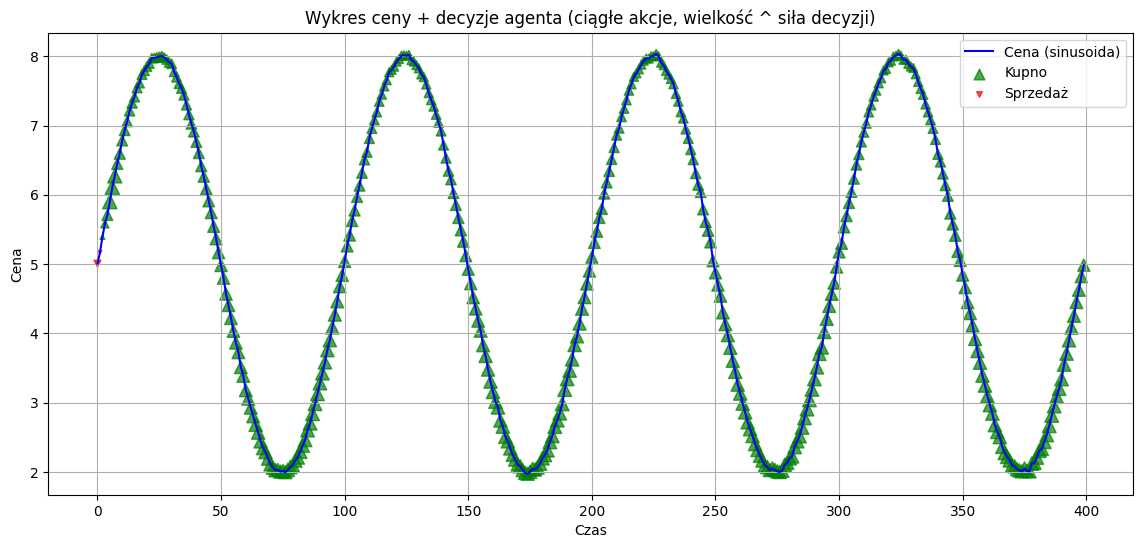

In [6]:
results_plot_continuous(env_predict=env_predict, prices=prices)

Bardzo duża różnica po drobnej mogłoby się wydawać zmianie w get_obserwation

Using cuda device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 400      |
|    ep_rew_mean     | 100      |
| time/              |          |
|    fps             | 783      |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 400      |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 102          |
| time/                   |              |
|    fps                  | 656          |
|    iterations           | 2            |
|    time_elapsed         | 1            |
|    total_timesteps      | 800          |
| train/                  |              |
|    approx_kl            | 0.0070185363 |
|    clip_fraction        | 0.0355       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.42        |
|    

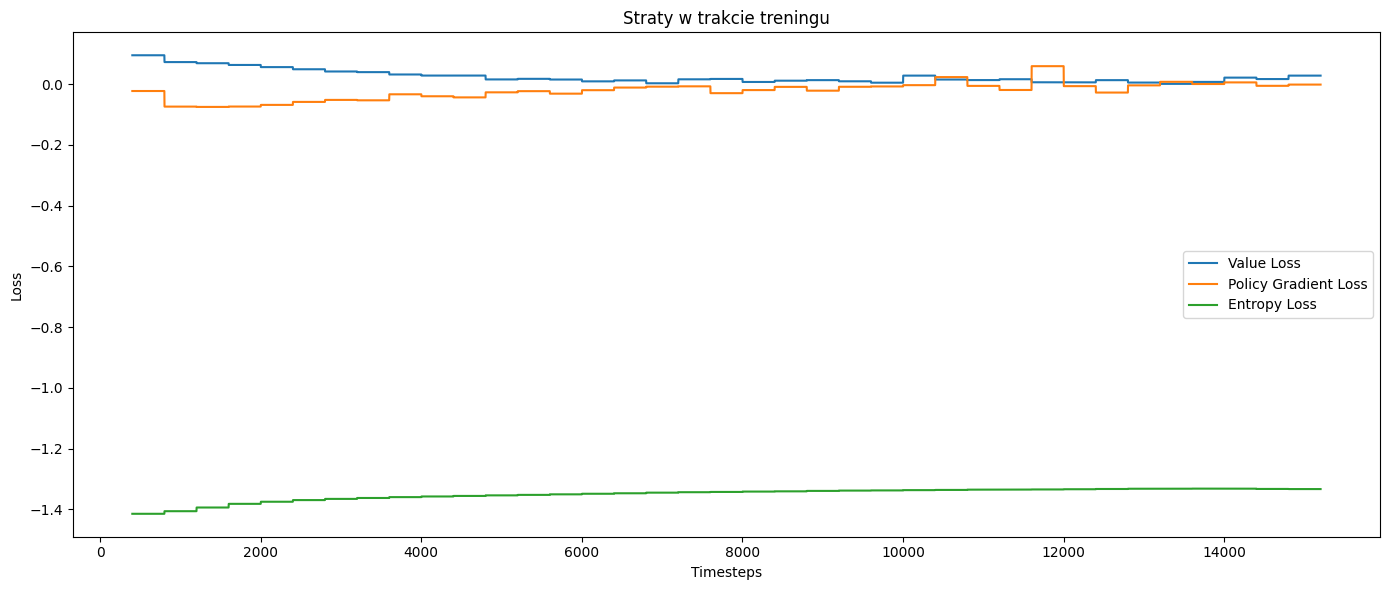

In [7]:
# Tworzenie instacji środowiska
env_agent = PriceDiffTradingEnvUpdated(prices)
env_agent = Monitor(env_agent)

# Sprawdzenie zgodności środowiska z stable_baselines3
check_env(env_agent)

logger_callback = TrainingLoggerCallback()
# Tworzenie modelu PPO
model_agent = PPO(
    "MlpPolicy",
    env_agent,
    # policy_kwargs=dict(
    #     net_arch=[
    #         256,
    #         256,
    #     ]
    # ),
    #   learning_rate=0.00005,        # domyślnie 3e-4
    n_steps=400,  # liczba kroków zanim agent zrobi aktualizację
    batch_size=100,  # batch size do uczenia
    # n_epochs=10,                 # ile razy przebiega po danych przy każdej aktualizacji
    gamma=0.3,  # współczynnik dyskontujący nagrody
    # gae_lambda=0.95,             # współczynnik GAE
    # clip_range=0.2,              # zakres klipu PPO (stabilizacja treningu)
    # ent_coef=0.9,                # zachęta do eksploracji
    verbose=1,
)

# Trening modelu
model_agent.learn(total_timesteps=15000, callback=logger_callback)


training_plot(logger_callback=logger_callback)

In [10]:
env_predict, lista = predict_data_env(
    env=PriceDiffTradingEnvUpdated, data=prices, agent=model_agent
)

Krok: 1|Cena: 5.17|Gotówka: 4.88|Akcje: 19|Wartość portfela: 103.08|Nagroda: 0.50|
Krok: 2|Cena: 5.39|Gotówka: 4.88|Akcje: 19|Wartość portfela: 107.33|Nagroda: 0.50|
Krok: 3|Cena: 5.58|Gotówka: 4.88|Akcje: 19|Wartość portfela: 110.95|Nagroda: 0.50|
Krok: 4|Cena: 5.71|Gotówka: 4.88|Akcje: 19|Wartość portfela: 113.35|Nagroda: 0.50|
Krok: 5|Cena: 5.90|Gotówka: 4.88|Akcje: 19|Wartość portfela: 117.05|Nagroda: 0.50|
Krok: 6|Cena: 6.11|Gotówka: 4.88|Akcje: 19|Wartość portfela: 120.97|Nagroda: 0.50|
Krok: 7|Cena: 6.27|Gotówka: 4.88|Akcje: 19|Wartość portfela: 124.09|Nagroda: 0.50|
Krok: 8|Cena: 6.45|Gotówka: 4.88|Akcje: 19|Wartość portfela: 127.40|Nagroda: 0.50|
Krok: 9|Cena: 6.59|Gotówka: 4.88|Akcje: 19|Wartość portfela: 130.17|Nagroda: 0.50|
Krok: 10|Cena: 6.78|Gotówka: 4.88|Akcje: 19|Wartość portfela: 133.79|Nagroda: 0.50|
Krok: 11|Cena: 6.93|Gotówka: 4.88|Akcje: 19|Wartość portfela: 136.59|Nagroda: 0.50|
Krok: 12|Cena: 7.06|Gotówka: 4.88|Akcje: 19|Wartość portfela: 139.01|Nagroda: 0.50|
K

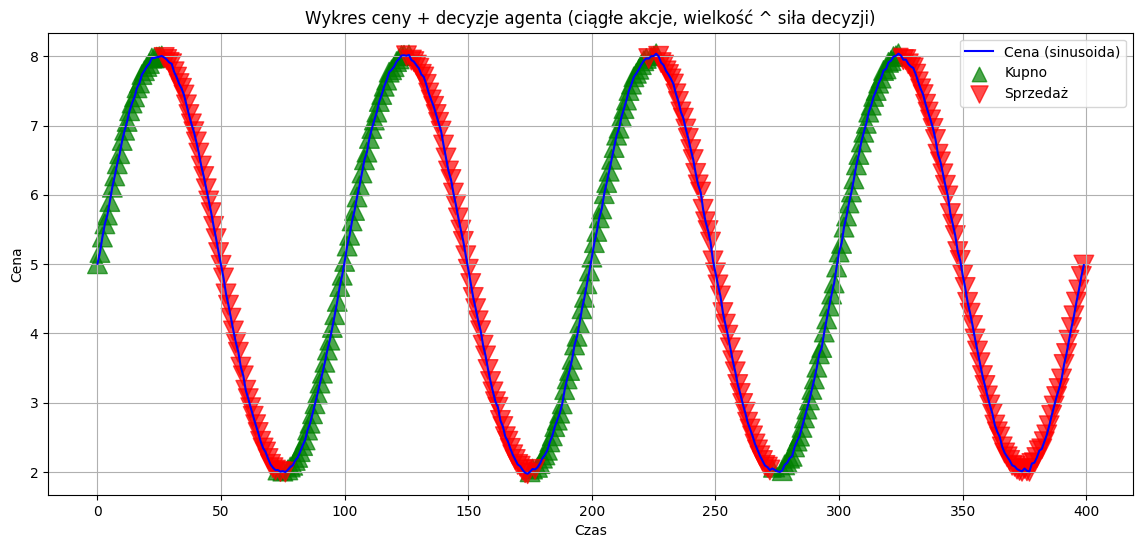

In [11]:
results_plot_continuous(env_predict=env_predict, prices=prices)

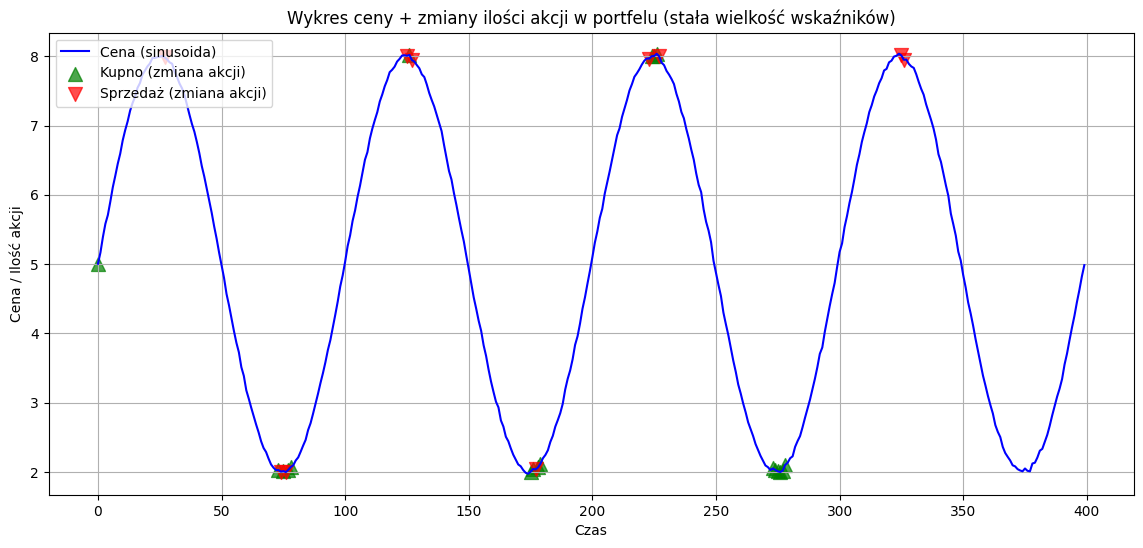

In [14]:
plot_shares_changes_fixed_size(lista, prices)